<a href="https://colab.research.google.com/github/taopikhidayat17/UTS_IntelgensiBuatan_TaopikHidayat/blob/main/E_1197050129_Taopik_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Judul : *Jaringan Saraf Tiruan dengan Metode Backpropagation untuk Mendeteski Wajah Menggunakan Python*

In [1]:
import os
from os import listdir
from PIL import Image as Img
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2

Penjelasan : **Untuk mengload Library nya**

In [2]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

Penjelasan : **Fungsi Harcascade adalah untuk menemukan fuingsi wajah manusia, kita bisa dwonload lewat github**

In [3]:
!wget "https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1"

--2021-12-25 16:58:04--  https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
Resolving drive.google.com (drive.google.com)... 173.194.215.139, 173.194.215.102, 173.194.215.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cov7n5u96f712dmd1n2pcftigfj86orc/1640451450000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download [following]
--2021-12-25 16:58:07--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cov7n5u96f712dmd1n2pcftigfj86orc/1640451450000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-04-4s-docs.googleusercontent.com (d

Penjelasan : **Setelah kita buka github maka akan masuk ke web google drive , kita copy linknya tapi ingat bukan semua link yang kita pake disini kita akan menggunakan fungsi !wget untuk menerima konten dan file dari berbagai server web**

In [7]:
MyFaceNet = load_model("facenet_keras.h5")

Penjelasan : **Fungsinya untuk membaca foto yang telah diupload untuk dideteksi **

In [8]:
folder='fotoPeserta/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)
    
    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
    
    if len(wajah)>0:
        x1, y1, width, height = wajah[0]         
    else:
        x1, y1, width, height = 1, 1, 10, 10
        
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)
    
    face = gbr_array[y1:y2, x1:x2]                        
    
    face = Img.fromarray(face)                       
    face = face.resize((160,160))
    face = asarray(face)
    
    face = face.astype('float32')
    mean, std = face.mean(), face.std()
    face = (face - mean) / std
    
    face = expand_dims(face, axis=0)
    signature = MyFaceNet.predict(face)
    
    database[os.path.splitext(filename)[0]]=signature

Penjelasan : **Database foto yang akan dibaca , disini saya hanya menggunakan foto saya saja untuk dibaca oleh database tersebut**

In [10]:
myfile = open("data.tugas", "wb")
pickle.dump(database, myfile)
myfile.close()

Penjelasan : **Setelah saya membuat databasenya , saya menggunakan file dengan nama data.tugas untuk menyimpan data tersebut.**

In [11]:
myfile = open("data.tugas", "rb")
database = pickle.load(myfile)
myfile.close()

Penjelasan : **Kode untuk menajalankan dan memanggil database tersebut, datanya akan otamtis muncul langsung **

In [12]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

Penjelasan : **Fungsi untuk convert**

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)
  return filename

Penjelasan :**Untuk kode ini sudah disediakan oleh google langsung tinggal kita modifikasi sebagian , untuk letaknya ada dibagian Camera Capture lalu kita insert langsung ( digunakan supaya google dapat mengakses webcam kita )**

<IPython.core.display.Javascript object>

Saved to photo.jpg


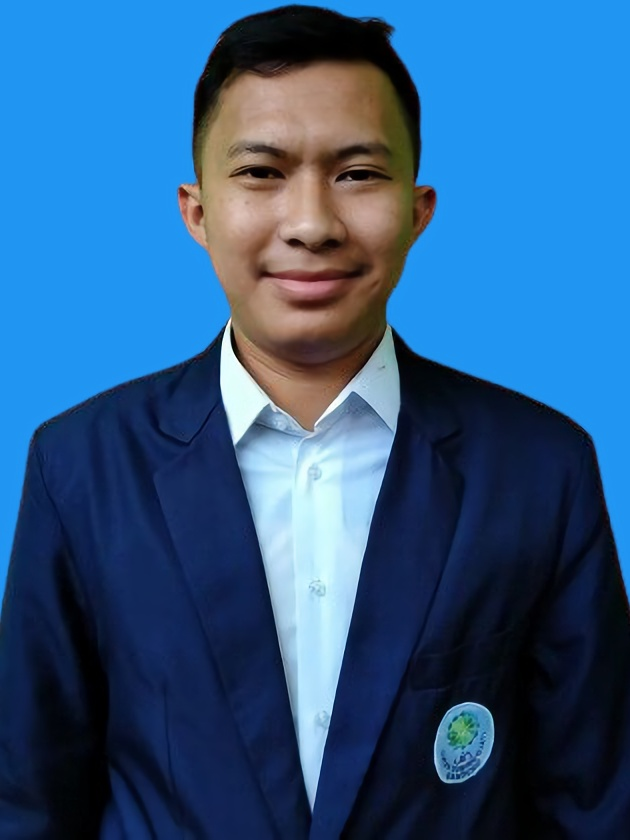

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Penjelasan : **Untuk mengcapture foto  dan dideteksi disesauikan dengan foto yang telah kita upload sebelumnya , berfungsi untuk berapapun wajah yang bisa di deteksi dan ini adalah output yang dihasilkan dari program yang telah saya buat**